Genre clasification neural network learning.

Tutoriály
https://www.geeksforgeeks.org/music-genre-classifier-using-machine-learning/
https://medium.com/analytics-vidhya/music-classification-using-deep-learning-python-b22614adb7a2
https://data-flair.training/blogs/python-project-music-genre-classification/

In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import librosa.display
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 

In [24]:
music_data = pd.read_csv('MusicGenre-dataset-test-1/file.csv') 
music_data.head(5)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [25]:
music_data['label'].value_counts()

label
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: count, dtype: int64

In [26]:
label_encoder = preprocessing.LabelEncoder() 
music_data['label'] = label_encoder.fit_transform(music_data['label'])

In [27]:
   
X = music_data.drop(['label','filename'],axis=1) 
y = music_data['label']

In [28]:
cols = X.columns 
minmax = preprocessing.MinMaxScaler() 
np_scaled = minmax.fit_transform(X) 
  
# new data frame with the new scaled data.  
X = pd.DataFrame(np_scaled, columns = cols)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  
                                                    test_size=0.3,  
                                                    random_state=111) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 58), (300, 58), (700,), (300,))

In [31]:
 
from sklearn.metrics import accuracy_score 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
import catboost as cb 
from xgboost import XGBClassifier 
  
rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0) 
cbc = cb.CatBoostClassifier(verbose=0, eval_metric='Accuracy', loss_function='MultiClass') 
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05) 
  
for clf in (rf, cbc, xgb): 
    clf.fit(X_train, y_train) 
    preds = clf.predict(X_test) 
    print(clf.__class__.__name__,accuracy_score(y_test, preds))

RandomForestClassifier 0.78
CatBoostClassifier 0.8333333333333334
XGBClassifier 0.7833333333333333


In [42]:
import tensorflow.keras as keras 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import *
  
model = Sequential() 
model.add(Flatten(input_shape=(58,))) 
model.add(Dense(256, activation='relu')) 
model.add(BatchNormalization()) 
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.3)) 
model.add(Dense(10, activation='softmax')) 
model.summary()

c:\Users\Zekon\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 58)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        15,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,314 (196.54 KB)

 Trainable params: 49,802 (194.54 KB)

 Non-trainable params: 512 (2.00 KB)

In [43]:
 # compile the model 
adam = keras.optimizers.Adam() 
model.compile(optimizer=adam, 
             loss="sparse_categorical_crossentropy", 
             metrics=["accuracy"]) 
  
hist = model.fit(X_train, y_train, 
                 validation_data = (X_test,y_test), 
                 epochs = 100, 
                 batch_size = 32)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2321 - loss: 2.2391 - val_accuracy: 0.2167 - val_loss: 2.2077
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5302 - loss: 1.3652 - val_accuracy: 0.1567 - val_loss: 2.1641
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6395 - loss: 1.0808 - val_accuracy: 0.2500 - val_loss: 2.0710
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6726 - loss: 0.9366 - val_accuracy: 0.3267 - val_loss: 1.9956
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7105 - loss: 0.8285 - val_accuracy: 0.3933 - val_loss: 1.9109
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7527 - loss: 0.7549 - val_accuracy: 0.3933 - val_loss: 1.8412
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7568 - loss: 0.6803 - val_accuracy: 0.6333 - val_loss: 1.7107
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7682 - loss: 0.6318 - val_accuracy: 0.6267 - v

In [44]:
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1) 
print(f"Test accuracy: {test_accuracy}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - accuracy: 0.7203 - loss: 1.4697
Test accuracy: 0.6800000071525574


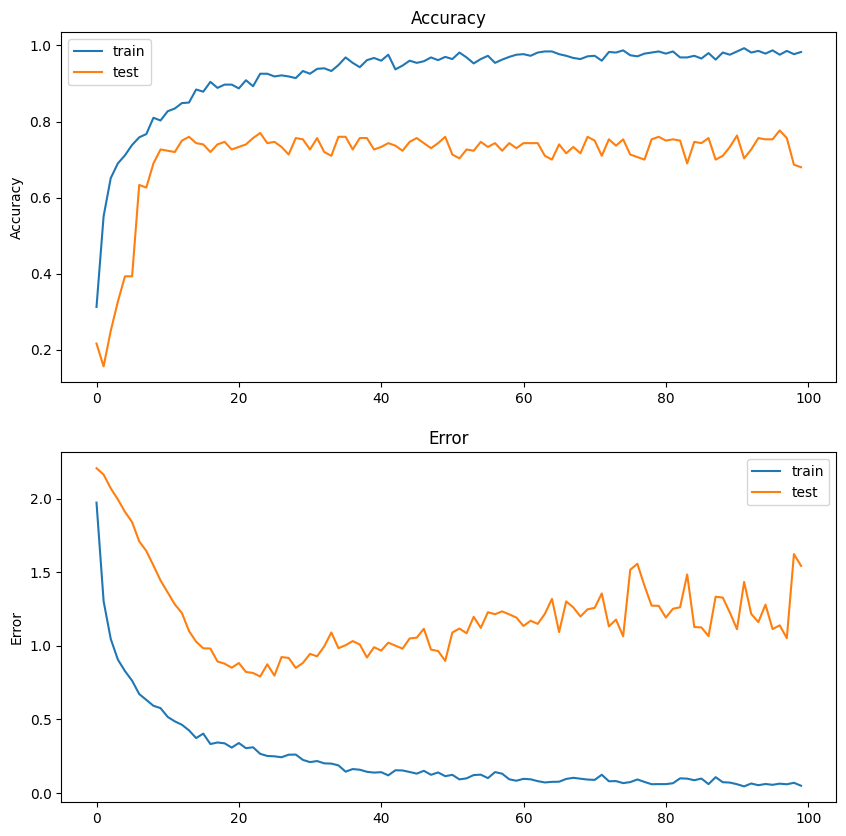

In [45]:
 
fig, axs = plt.subplots(2,figsize=(10,10)) 
  
# accuracy  
axs[0].plot(hist.history["accuracy"], label="train") 
axs[0].plot(hist.history["val_accuracy"], label="test")     
axs[0].set_ylabel("Accuracy") 
axs[0].legend() 
axs[0].set_title("Accuracy") 
      
# Error  
axs[1].plot(hist.history["loss"], label="train") 
axs[1].plot(hist.history["val_loss"], label="test")     
axs[1].set_ylabel("Error") 
axs[1].legend() 
axs[1].set_title("Error") 
      
plt.show()